In [33]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np


In [3]:
salary_csv = "EmployeeSQL/Data/salaries.csv"
salary = pd.read_csv(salary_csv)

titles_csv = "EmployeeSQL/Data/titles.csv"
titles = pd.read_csv(titles_csv)


titles.head()


,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [4]:
salary.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [5]:
# Create a histogram to visualize the most common salary ranges for employees.

mrg= pd.merge(titles, salary, on = "emp_no", how ="inner")
mrg.head()

,emp_no,title,from_date_x,to_date_x,salary,from_date_y,to_date_y
0,10001,Senior Engineer,1986-06-26,9999-01-01,60117,1986-06-26,1987-06-26
1,10002,Staff,1996-08-03,9999-01-01,65828,1996-08-03,1997-08-03
2,10003,Senior Engineer,1995-12-03,9999-01-01,40006,1995-12-03,1996-12-02
3,10004,Engineer,1986-12-01,1995-12-01,40054,1986-12-01,1987-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01,40054,1986-12-01,1987-12-01


In [78]:
# Create a histogram to visualize the most common salary ranges for employees.
df=pd.DataFrame(mrg)

df[[ 'title','salary']].head()

,title,salary
0,Senior Engineer,60117
1,Staff,65828
2,Senior Engineer,40006
3,Engineer,40054
4,Senior Engineer,40054


/Users/saba/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


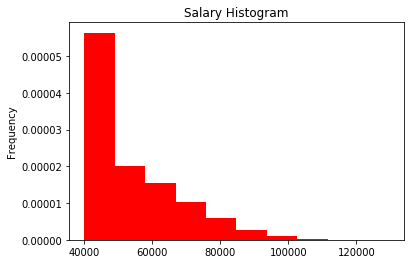

In [93]:

interesting_columns = ['salary', 'title']

for column in interesting_columns:
    df['salary'].plot.hist(by=df[column], normed=True, title= 'Salary Histogram', color='r')


In [94]:
plt.savefig("Bonus_images/Histogram.png")

<Figure size 432x288 with 0 Axes>

In [6]:
# Create a bar chart of average salary by title.
grouped = mrg.groupby("title").mean()
grouped

,emp_no,salary
title,,
Assistant Engineer,251495.398533,48493.204786
Engineer,252943.159987,48539.781423
Manager,110780.833333,51531.041667
Senior Engineer,253034.375949,48506.751806
Senior Staff,253423.367183,58503.286614
Staff,253399.240672,58465.271904
Technique Leader,251708.951052,48580.505772


In [7]:
grouped_final = grouped.drop(columns = "emp_no")
grouped_final

,salary
title,
Assistant Engineer,48493.204786
Engineer,48539.781423
Manager,51531.041667
Senior Engineer,48506.751806
Senior Staff,58503.286614
Staff,58465.271904
Technique Leader,48580.505772


In [8]:
grouped_final_reset = grouped_final.reset_index()
grouped_final_reset

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


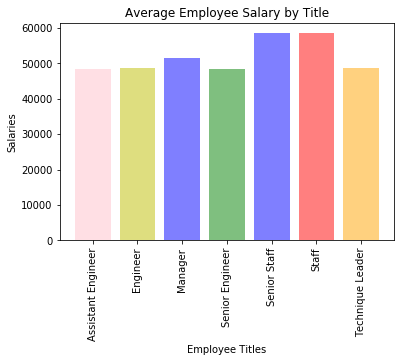

In [53]:
# Set x_axis, y_axis & Tick Locations
x_axis = grouped_final_reset["title"]
ticks = np.arange(len(x_axis))
y_axis = grouped_final_reset["salary"]
 
# Create Bar Chart Based on Above Data
plt.bar(x_axis, y_axis, align="center", alpha=0.5, color=["pink", "y", "b", "g","b", "r", "orange"])

# Create Ticks for Bar Chart's x_axis
plt.xticks(ticks, x_axis, rotation="vertical")

# Set Labels & Title
plt.ylabel("Salaries")
plt.xlabel("Employee Titles")
plt.title("Average Employee Salary by Title")

# Save Figure

# Show plot
plt.show()

In [95]:
plt.savefig("Bonus_images/average_salary_by_title.png")


<Figure size 432x288 with 0 Axes>

In [ ]:
# Analysis:

# These tables are made after building relationships between tables.
# the above tables show relatinship between job tiltes and conresponding salaries.
# The hisogram and bar chart shows the highest salary range falls between 48,000 to 50,000 and the ..
# ..senior staff and the staff collectively earns the most salary from others. 
